In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from imageio import imread
from sklearn.decomposition import TruncatedSVD

N_SUBJECTS = 40
IMG_WIDTH = 92
IMG_HEIGHT = 112
SVD_COMPONENTS = 20

def display_images(mat, display_cols=5):
    """Display one or more images in the `mat` ndarray, where each row represents an individual image.
    Each extracted row in the `mat` ndarray should be IMG_WIDTH x IMG_HEIGHT in size.
    """
    plt.figure(figsize=(20,40))

    images = np.vsplit(mat, mat.shape[0])
    for i, image in enumerate(images):
        plt.subplot(len(images)/display_cols+1, display_cols, i+1)
        plt.imshow(image.reshape((IMG_HEIGHT, -1)), cmap='gray')

In [2]:
X = np.vstack([imread('datasets/att_faces/s{}/1.pgm'.format(i)).reshape((1, -1)) for i in range(1, N_SUBJECTS+1)])
print(X.shape)

(40, 10304)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


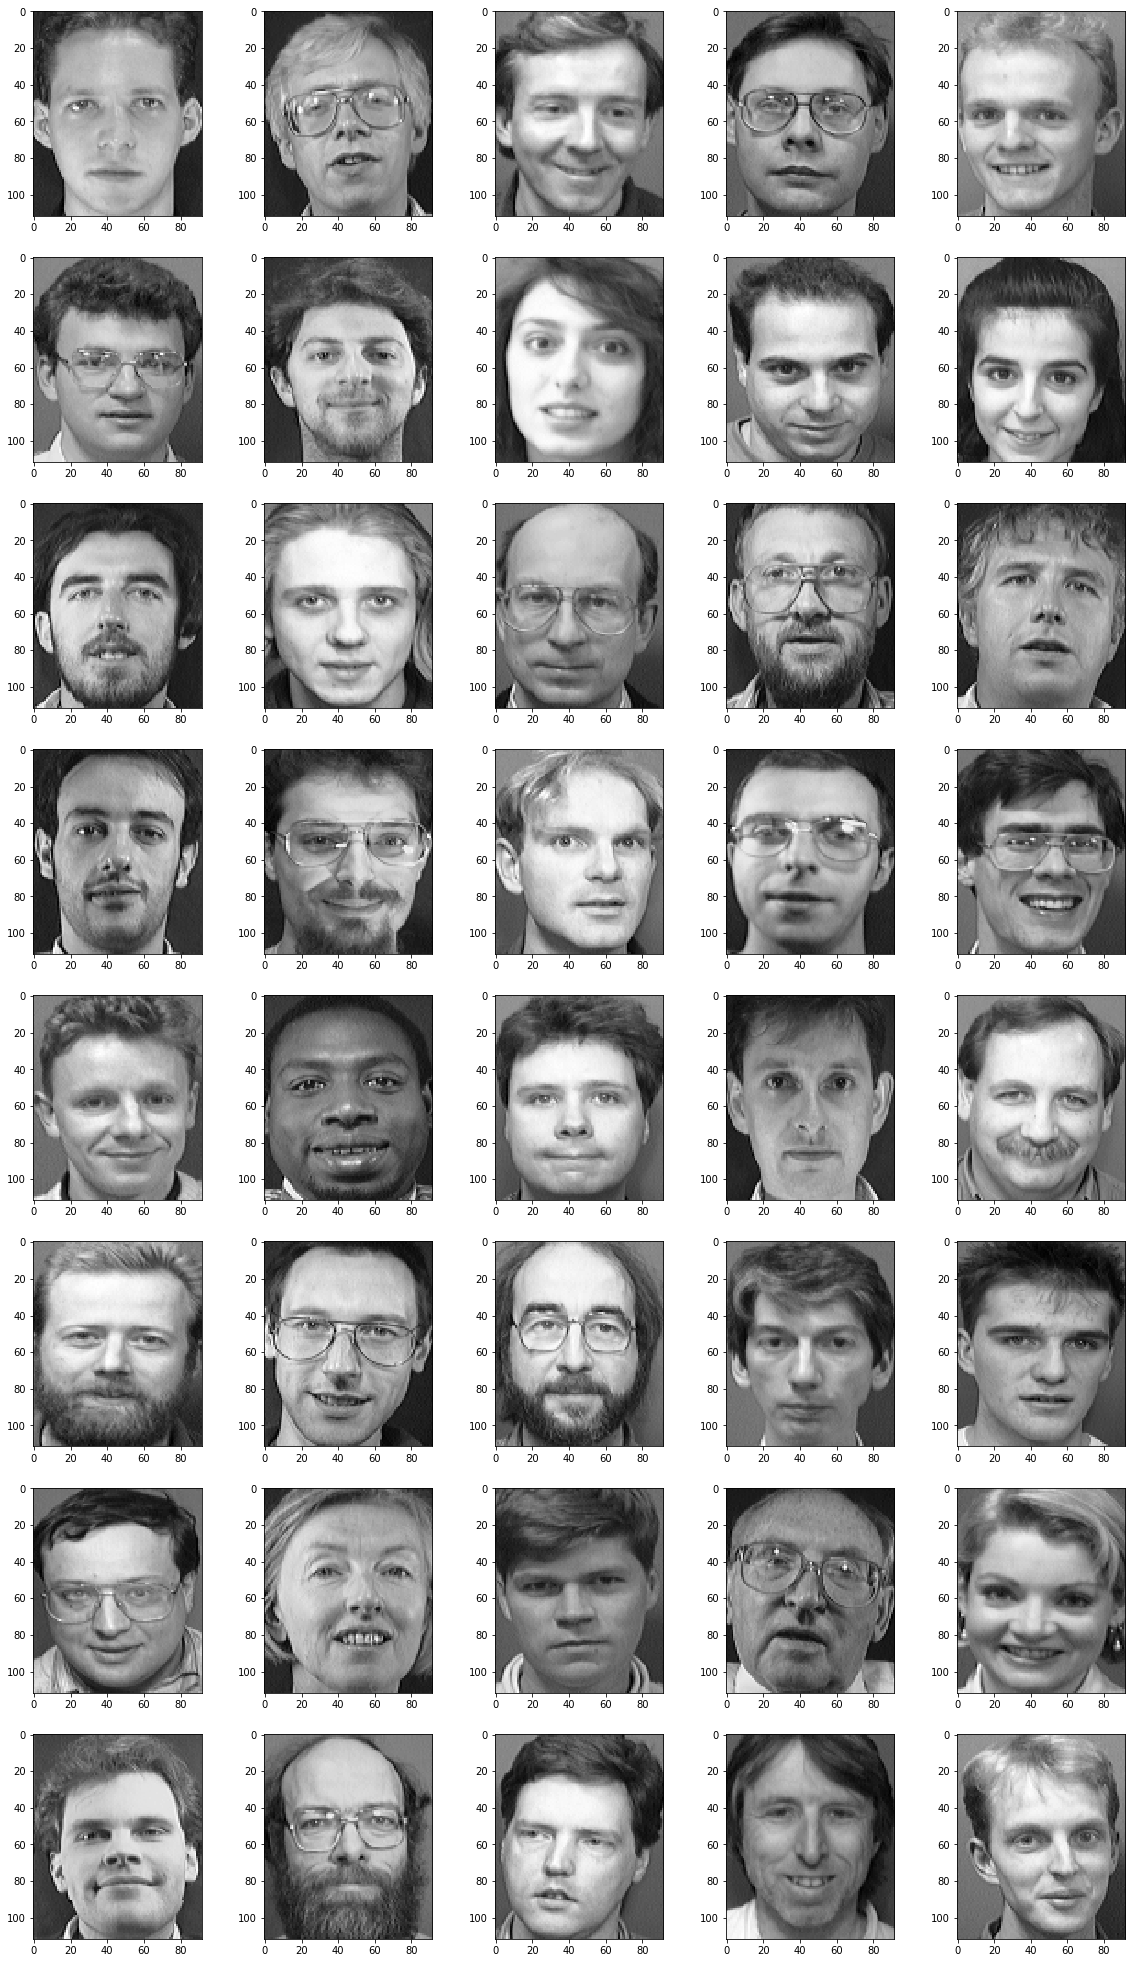

In [3]:
display_images(X)

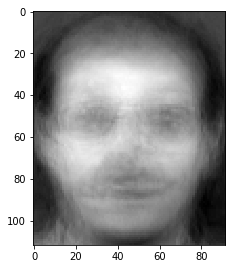

In [4]:
mean_X = X.mean(axis=0, keepdims=1)
display_images(mean_X)

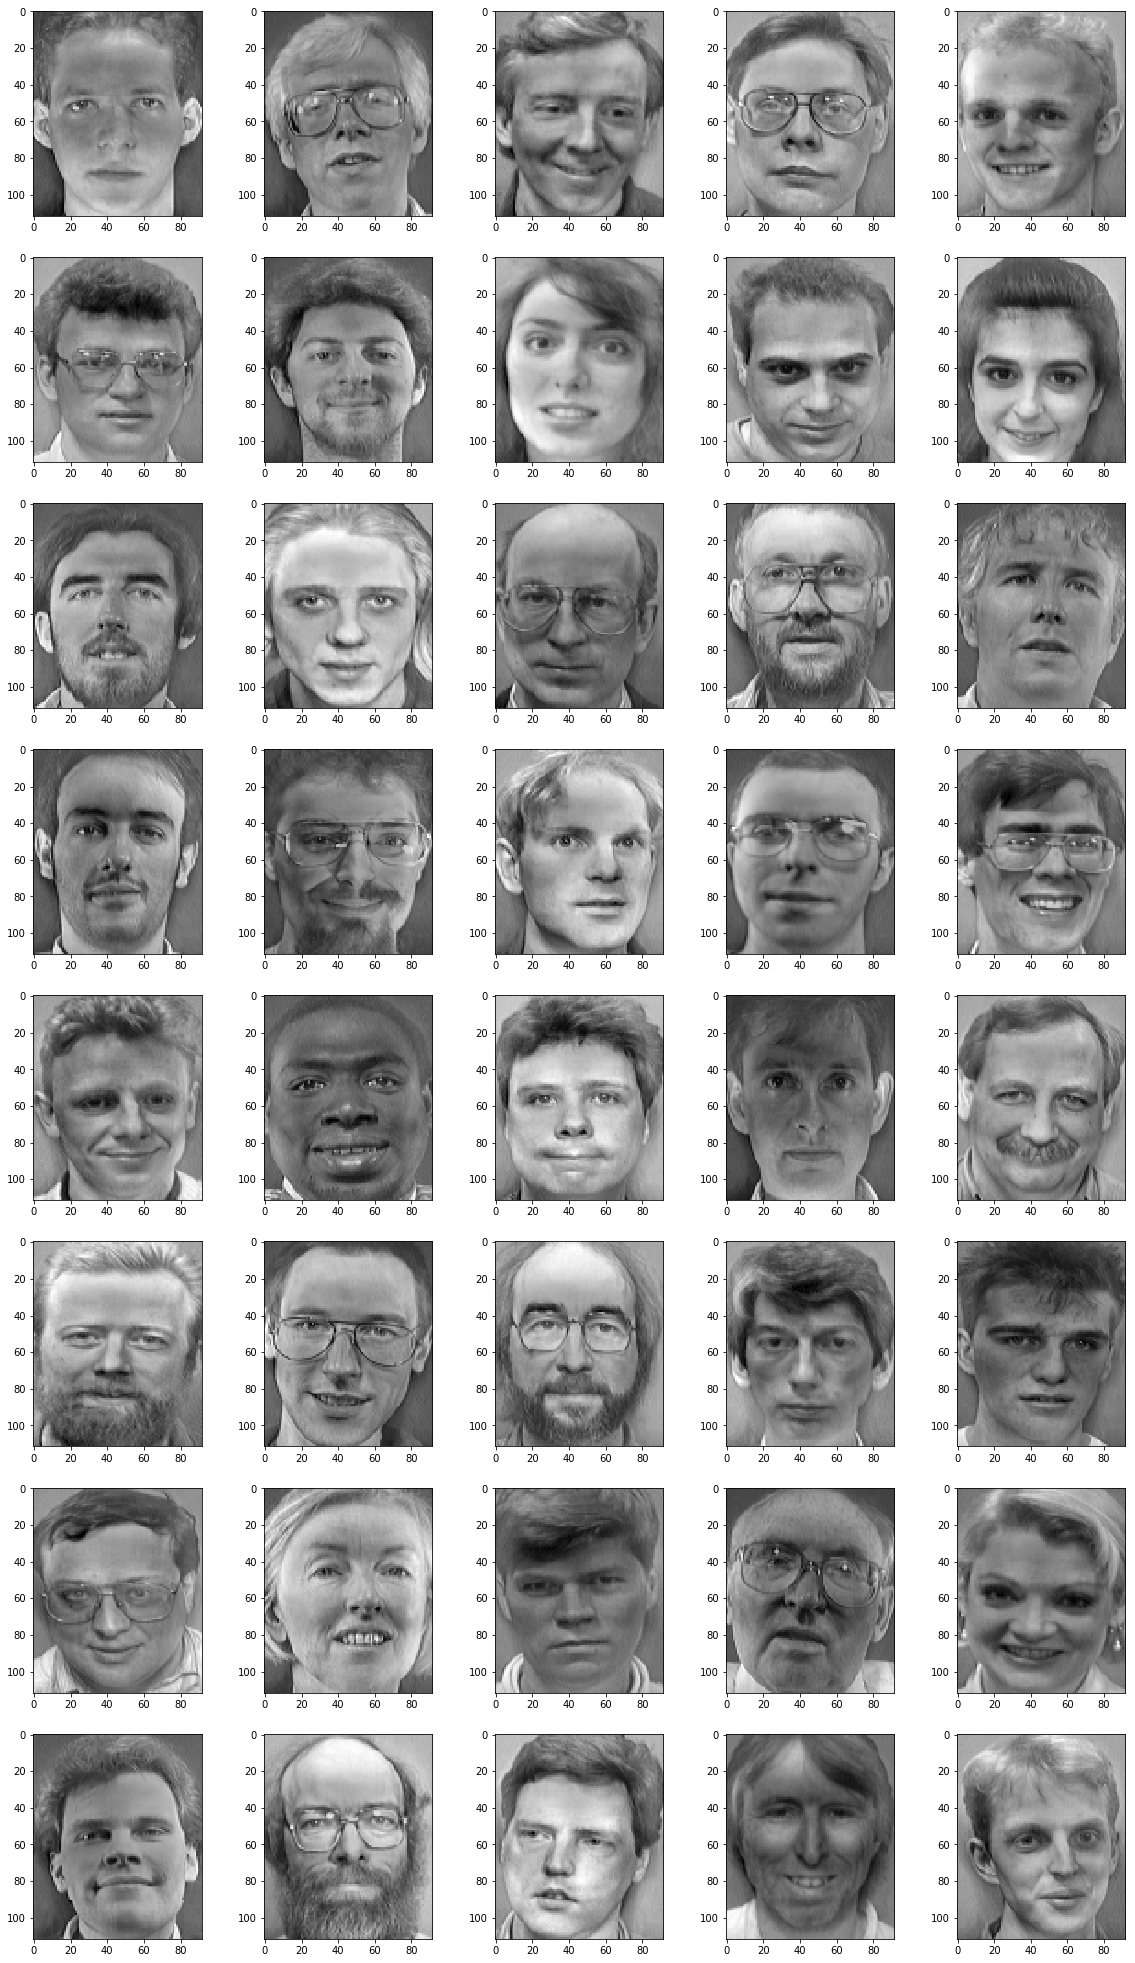

In [5]:
centered_X = X-mean_X
display_images(centered_X)

In [6]:
u, s, v = svd(centered_X)

Text(0, 0.5, 'Explained Variance Ratio')

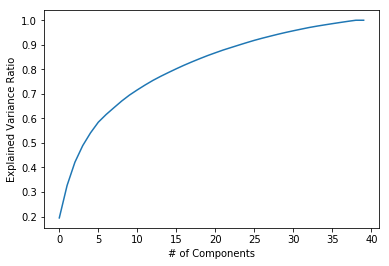

In [7]:
s_squared = s ** 2
variance_ratio = np.cumsum(s_squared) / s_squared.sum()
plt.plot(range(len(variance_ratio)), variance_ratio)
plt.xlabel('# of Components')
plt.ylabel('Explained Variance Ratio')

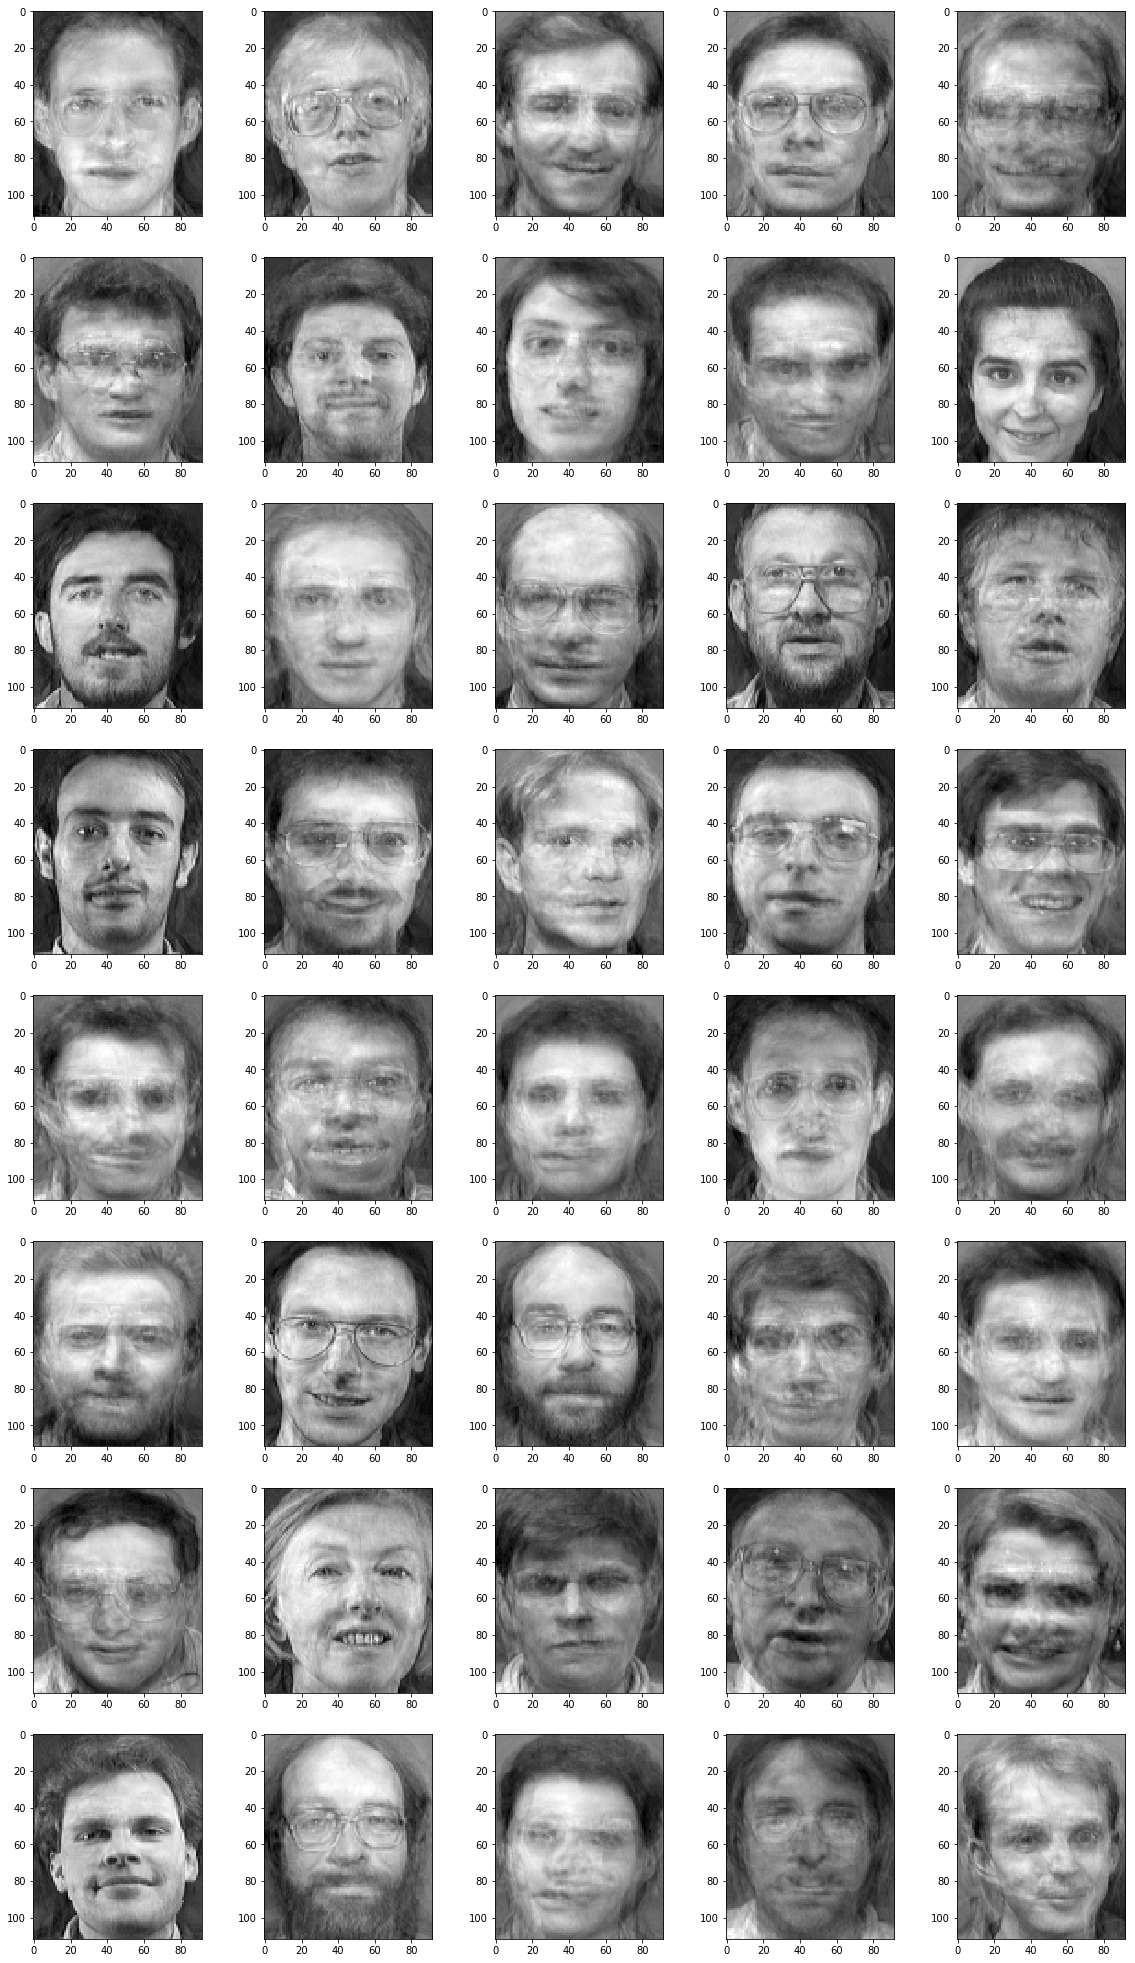

In [8]:
v = v[:SVD_COMPONENTS, :]
low_dim_X = centered_X @ v.T
reconstructed_X = low_dim_X @ v
display_images(reconstructed_X + mean_X)

# Using TruncatedSVD to do everything in one-shot

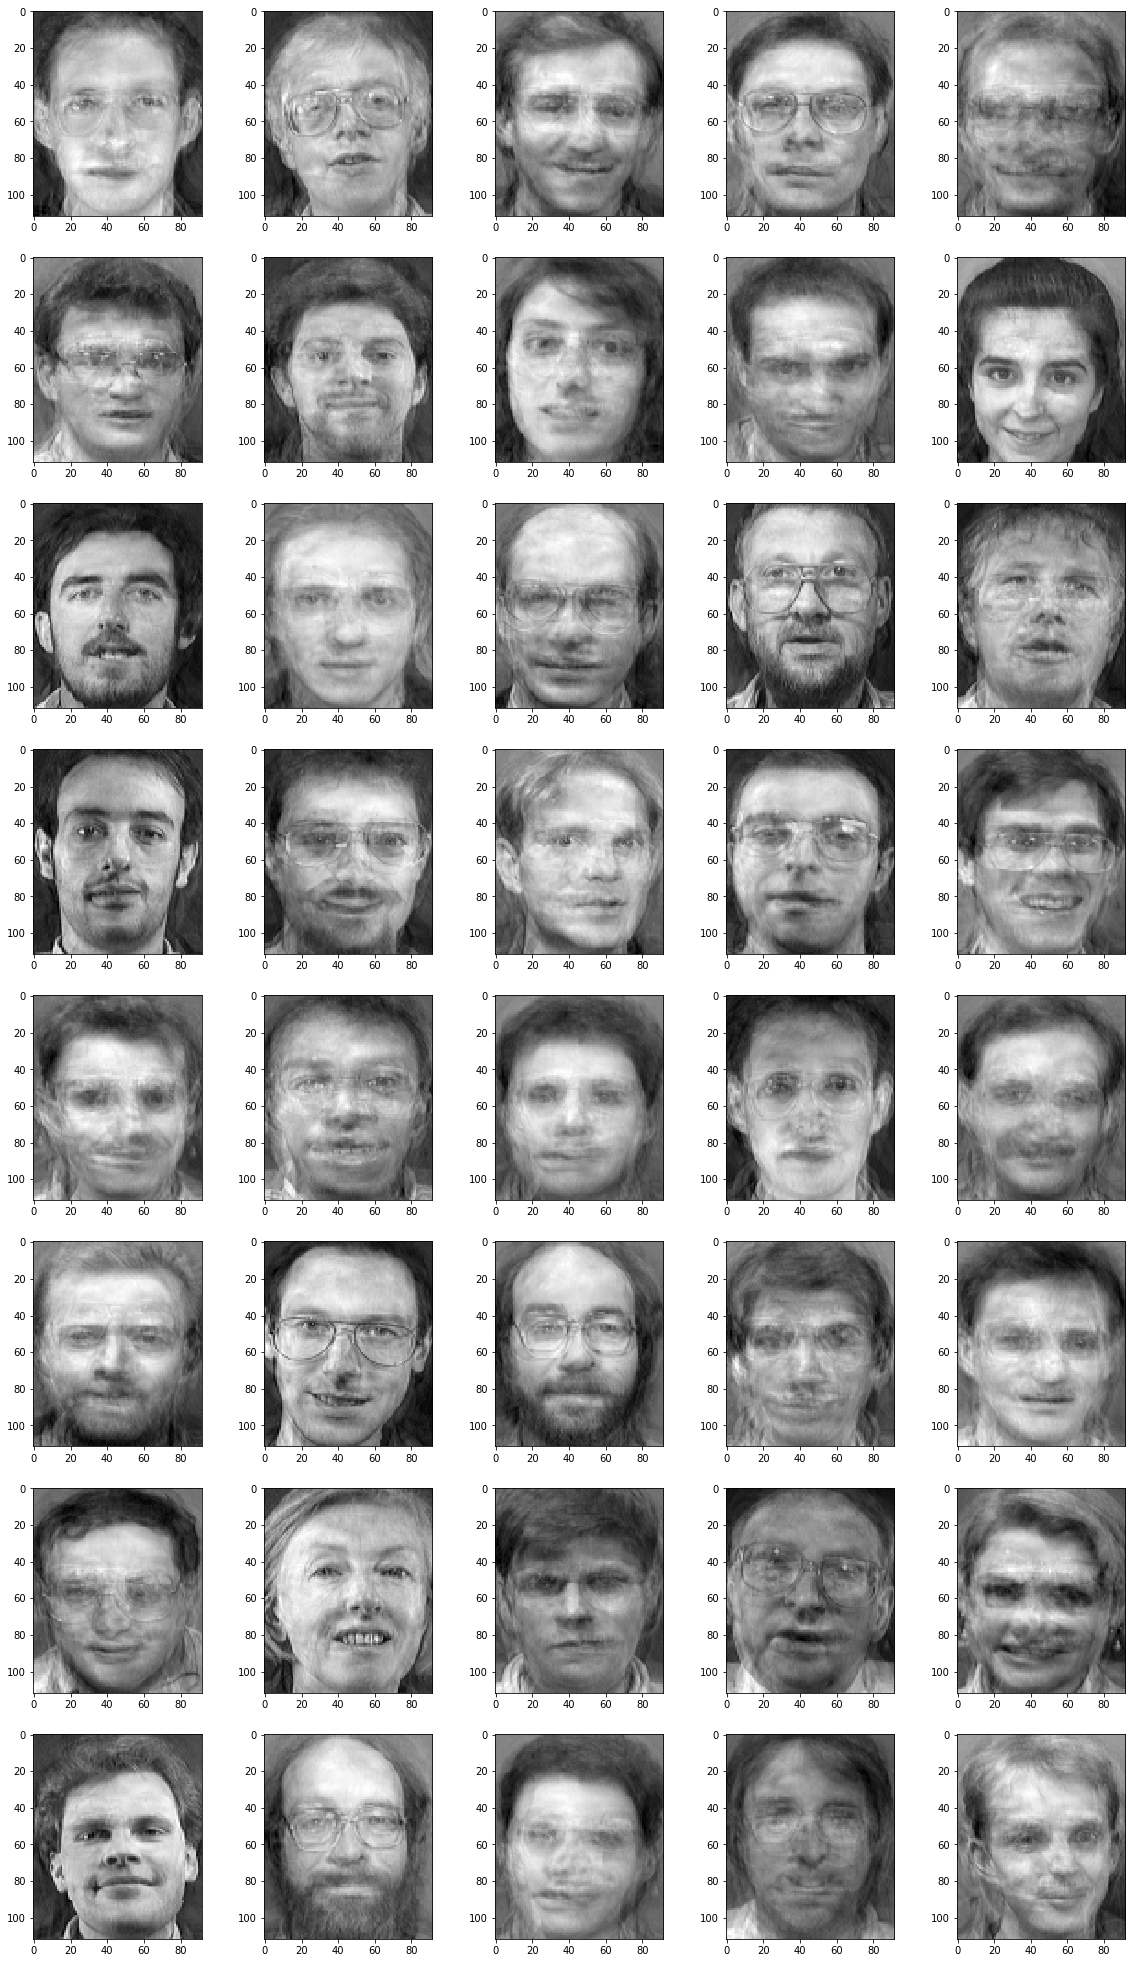

In [9]:
tsvd = TruncatedSVD(n_components=SVD_COMPONENTS)
tsvd.fit(centered_X)
low_dim_X = tsvd.transform(centered_X)
reconstructed_X = tsvd.inverse_transform(low_dim_X)
display_images(reconstructed_X + mean_X)

(80, 10304)
(80, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """


<IPython.core.display.Javascript object>


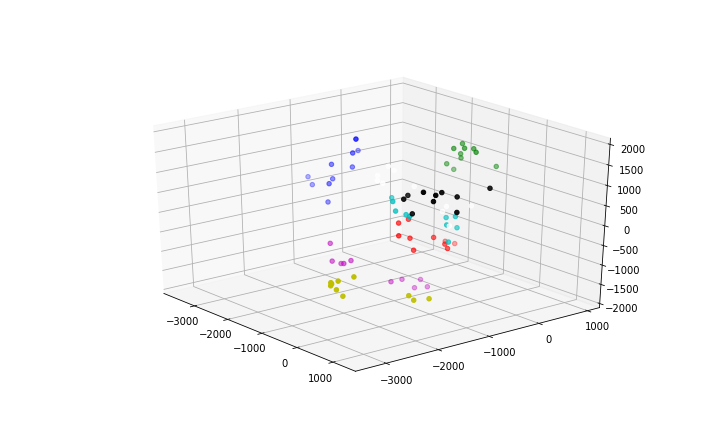

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N_SUBJECTS = 8
X_all = np.vstack([imread('datasets/att_faces/s{}/{}.pgm'.format(i, j)).reshape((1, -1)) for i in range(1, N_SUBJECTS+1) for j in range(1,11)])
print(X_all.shape)
centered_X_all = X_all-mean_X

tsvd = TruncatedSVD(n_components=3)
tsvd.fit(centered_X)

low_dim_X_all = tsvd.transform(centered_X_all)
print(low_dim_X_all.shape)
ax = plt.axes(projection='3d')

ax.scatter3D(
    low_dim_X_all[:, 0], low_dim_X_all[:, 1], low_dim_X_all[:, 2],
    c=['b']*10 + ['g']*10 + ['r']*10 + ['c']*10 + ['m']*10 + ['y']*10 + ['k']*10 + ['w']*10
)